### Comparative plot for Vision Zero Code ###
by Richard Sowers

* <r-sowers@illinois.edu>

<https://publish.illinois.edu/r-sowers/>

Copyright 2018 University of Illinois Board of Trustees. All Rights Reserved. Licensed under the MIT license

imports

In [1]:
%matplotlib inline
from matplotlib import pylab as plotter
import pandas
import numpy
import importlib
import MAIN_makeplots_safety as makeplots
import pickle
import MAIN_config_hour_of_day as config
from scipy.stats.stats import linregress
#import MAIN_config_season as config

External files

In [9]:
dir_names=config.dirnames
curvefigfile="curve_compare_safety_mid.png"
scatterfigfile="scatter_compare_safety_mid.png"

In [10]:
timewin = "Midday"
TradeoffDict={}
dataName="ManhattanComputations"+"/FINAL_"+timewin+"/data.p"
data1=pickle.load(open(dataName,"rb"))
TradeoffDict["Manhattan "+"midday"]=makeplots.tradeoff(data1)
dataName2 = "UpperManComps/FINAL_"+timewin+"/data.p"
data2=pickle.load(open(dataName2,"rb"))
TradeoffDict["Upper Manhattan "+ "midday"]=makeplots.tradeoff(data2)

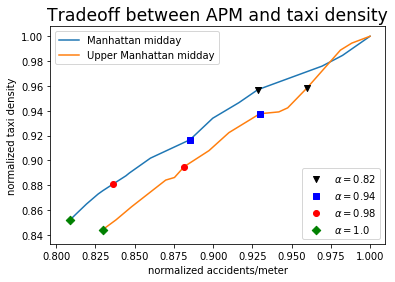

In [11]:
x_pts = []
y_pts = []

plotter.figure()
    


for ind,(windowname,tradeoff) in enumerate(TradeoffDict.items()):
    points=tradeoff.curve()
    x_pts = x_pts + [pt for pt in points["rel_APM"]]
    y_pts = y_pts + [pt for pt in points["rel_trips"]]
    l, = plotter.plot(points["rel_APM"],points["rel_trips"],label=windowname,zorder=1)
    s1=plotter.scatter(points["rel_APM"].iloc[3],points["rel_trips"].iloc[3],label=None,marker = 'v',zorder=4,color='black')
    s2=plotter.scatter(points["rel_APM"].iloc[6],points["rel_trips"].iloc[6],label=None,marker = 's',zorder=3,color='blue')
    s3=plotter.scatter(points["rel_APM"].iloc[10],points["rel_trips"].iloc[10],label=None,marker = 'o',zorder=5,color='red')
    s4=plotter.scatter(points["rel_APM"].iloc[15],points["rel_trips"].iloc[15],label=None,marker = 'D',zorder=2,color='green')
    
    
x_pts = numpy.array(x_pts)
y_pts = numpy.array(y_pts)
slope, intercept, r_value, p_value, std_err = linregress(x_pts, y_pts)
#plotter.plot(x_pts,slope*x_pts + intercept,label ="Best fit line, r² = {:.3f}".format(r_value**2))
#plotter.xlim(0.9,)
#plotter.ylim(0.9,)
plotter.title("Tradeoff between APM and taxi density",fontsize='xx-large')
plotter.ylabel("normalized taxi density",fontsize='medium')
plotter.xlabel("normalized accidents/meter",fontsize='medium')
legend2=plotter.legend((s1,s2,s3,s4),('$\\alpha=0.82$','$\\alpha=0.94$','$\\alpha=0.98$','$\\alpha=1.0$'),loc=4)
plotter.legend()
plotter.gca().add_artist(legend2)
#plotter.legend(loc=0,prop={'size':9})
plotter.savefig(curvefigfile,bbox_inches='tight')
plotter.show()
plotter.close()

In [14]:
slope, intercept, r_value, p_value, std_err = linregress(numpy.array(x_pts), numpy.array(y_pts))

print(r_value**2)

0.9154778545047791


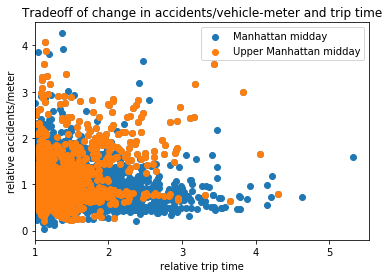

In [15]:
plotter.figure()
for windowname,tradeoff in TradeoffDict.items():
    scatterPoints=tradeoff.avoidancePoints()
    xvals=scatterPoints["trip_time"]
    yvals=scatterPoints["trip_APVM"]
    plotter.scatter(xvals,yvals,label=windowname)
plotter.xlim(1,)
plotter.title("Tradeoff of change in accidents/vehicle-meter and trip time")
plotter.xlabel("relative trip time")
plotter.ylabel("relative accidents/meter")
plotter.legend()
plotter.savefig(scatterfigfile,bbox_inches='tight')
plotter.show()
plotter.close()